In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_set.csv',index_col=0)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Job Categories,Seniority,Description_Length,Competitor Count
318,"Sr. Data Scientist, Cyber-Security LT Contract",$116K-$194K (Glassdoor est.),SUMMARYSenior Data Scientist will assist the c...,3.2,"Numeric, LLC","Phila, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,-1,1,1,1,1,Data Scientist,Senior,208,0
533,Director Data Science,$124K-$199K (Glassdoor est.),We’re looking for a director to drive our data...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,33,1,0,1,1,Director,NaN,753,0
539,Senior Scientist - Biostatistician,$65K-$96K (Glassdoor est.),British American Tobacco\r\nReynolds American ...,3.1,Reynolds American,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,1,147,0,0,0,1,Data Analyst,Senior,698,0
653,Data Engineer - Consultant (Charlotte Based),$59K-$112K (Glassdoor est.),Do YOU love working with Data in machine learn...,4.2,Clarity Insights,"Charlotte, NC","Chicago, IL",201 to 500 employees,2008,Company - Private,...,0,14,1,0,0,1,Data Engineer,NaN,765,0
586,Data Scientist,$108K-$171K (Glassdoor est.),Advanced degree in Data Science Statistics Com...,3.5,e-IT Professionals Corp.,"Foster City, CA","Canton, MI",51 to 200 employees,-1,Company - Private,...,0,-1,1,0,0,0,Data Scientist,NaN,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,Data Engineer,$57K-$80K (Glassdoor est.),Position Summary:\r\n\r\nThe Data Engineer wil...,3.5,Saama Technologies Inc,"Phoenix, AZ","Campbell, CA",501 to 1000 employees,1997,Company - Private,...,0,25,1,1,0,0,Data Engineer,NaN,151,3
79,"Director, Data Science",$139K-$220K (Glassdoor est.),"Reporting to the Sr. Director, Analytics & Dat...",3.6,Grainger,"Lake Forest, IL","Lake Forest, IL",10000+ employees,1927,Company - Public,...,1,95,1,0,0,1,Director,NaN,370,0
759,Data Engineer,$57K-$109K (Glassdoor est.),ICW Group is looking for aData Engineer who wi...,2.8,ICW Group,"San Diego, CA","San Diego, CA",501 to 1000 employees,1972,Company - Private,...,1,50,0,0,0,0,Data Engineer,NaN,481,3
730,Data Modeler (Analytical Systems),$66K-$117K (Glassdoor est.),"At MassMutual, were passionate about helping m...",3.6,MassMutual,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,0,171,0,1,1,1,Other,NaN,541,0


# Time to find correlations

In [3]:
df[['Age of Company','Avg Salary','Rating','Description_Length']].corr()

,Age of Company,Avg Salary,Rating,Description_Length
Age of Company,1.000000,-0.006351,-0.082665,0.155644
Avg Salary,-0.006351,1.000000,0.132609,0.083286
Rating,-0.082665,0.132609,1.000000,-0.056818
Description_Length,0.155644,0.083286,-0.056818,1.000000


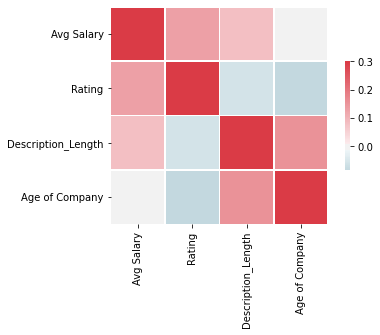

In [4]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

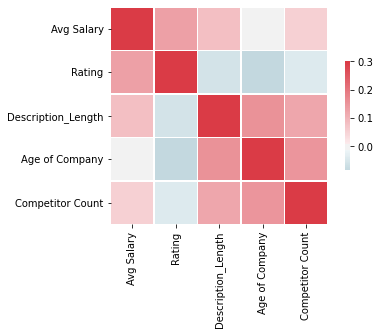

In [5]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company','Competitor Count']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length',
       'Competitor Count'],
      dtype='object')

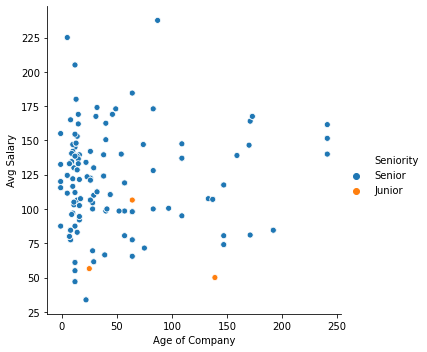

In [7]:
#we can see here that the juniors are on the lower half of the graph indicating a negative correlation
sns.relplot(x="Age of Company", y="Avg Salary",hue="Seniority", data=df)

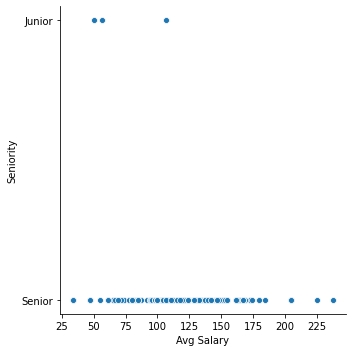

In [8]:
sns.relplot(x="Avg Salary",y="Seniority", data=df)

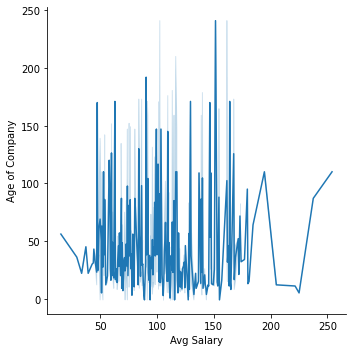

In [9]:
g = sns.relplot(x="Avg Salary", y="Age of Company", kind="line", data=df)
#g.figure.autofmt_xdate()

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length',
       'Competitor Count'],
      dtype='object')

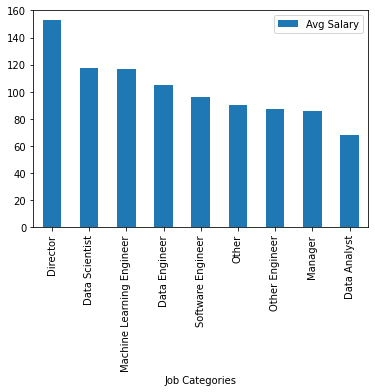

In [11]:
job_cat = pd.pivot_table(df, index =['Job Categories'], values='Avg Salary').sort_values('Avg Salary', ascending=False)

job_cat.plot(kind='bar')


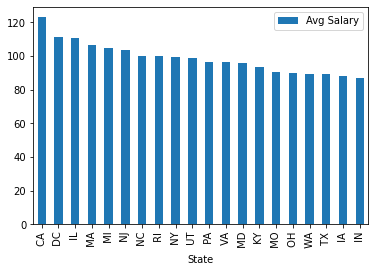

In [12]:
states = pd.pivot_table(df, index = 'State', values='Avg Salary').sort_values('Avg Salary', ascending=False)

top_states = states.head(20)

top_states.plot(kind='bar')

In [13]:
job_tools = pd.pivot_table(df, index =['Spark','Python','AWS','Excel'], values='Avg Salary')
job_tools

Avg Salary
Spark Python AWS Excel            
0     0      0   0       92.354167
                 1       83.022917
             1   0       81.107143
                 1      102.333333
      1      0   0      112.264286
                 1      106.164706
             1   0      119.365385
                 1      111.100000
1     0      0   0       47.000000
                 1       95.388889
             1   0      130.857143
                 1      106.300000
      1      0   0      106.839286
                 1      113.821429
             1   0      123.683333
                 1      109.884615

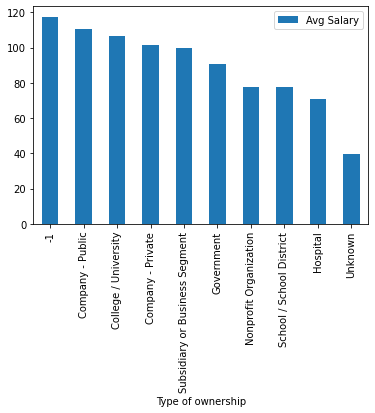

In [14]:
ownership = pd.pivot_table(df, index =['Type of ownership'], values='Avg Salary').sort_values('Avg Salary', ascending=False)
ownership.plot(kind='bar')

In [15]:
industries = pd.pivot_table(df, index =['Industry'], values='Avg Salary').sort_values('Avg Salary', ascending=False)

industries.head(10)

,Avg Salary
Industry,
Other Retail Stores,163.500000
Financial Analytics & Research,145.857143
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Internet,118.525000
Investment Banking & Asset Management,118.400000
TV Broadcast & Cable Networks,117.750000
-1,114.650000


In [16]:
industries.tail(10).sort_values('Avg Salary', ascending=True)

,Avg Salary
Industry,
Telecommunications Manufacturing,44.000000
Architectural & Engineering Services,47.166667
Social Assistance,48.500000
Gambling,48.500000
Food & Beverage Manufacturing,53.250000
Banks & Credit Unions,62.375000
"Department, Clothing, & Shoe Stores",63.500000
Construction,66.250000
Financial Transaction Processing,69.000000


In [17]:
# this is way too many

company = pd.pivot_table(df, index =['Company Name'], values='Avg Salary')
company

,Avg Salary
Company Name,
"1-800-FLOWERS.COM, Inc.",76.5
1904labs,143.5
23andMe,92.0
7Park Data,121.0
ALIN,110.5
...,...
e-IT Professionals Corp.,139.5
goTRG,85.5
h2o.ai,152.0


In [18]:
# this data is clearly not very different, so we won't be using this

headquarters = pd.pivot_table(df, index =['Is_Headquarters'], values='Avg Salary')
headquarters

,Avg Salary
Is_Headquarters,
0,102.307769
1,100.240497


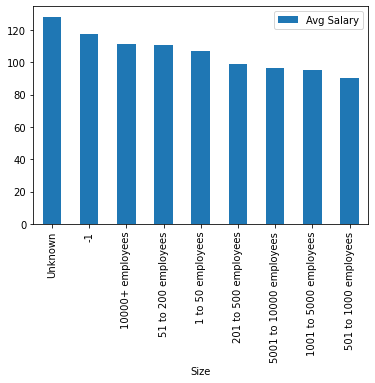

In [19]:
# an interesting trend...smaller companies tend to pay more, except for 10000+ companies that pay the most

size = pd.pivot_table(df, index=['Size'], values='Avg Salary').sort_values('Avg Salary', ascending=False)

size.plot(kind='bar')

In [44]:
rev = pd.pivot_table(df, index=['Revenue'], values='Avg Salary').sort_values('Avg Salary', ascending=False)

rev

# there are big differences in the salaries but a strange distribution of the revenue. the highest paying companies
# are those with the smallest revenues as well as the BIGGEST revenue. it is quite confusing 
# I think we should change these values if we choose to use revenue.

# big: 10+ bil, 5-10 bil, 2 to 5 bil, 1 to 2 bill
# medium: 500 mil to 1 bil, 100 to 500 mill, 50 to 100 mil, 25 to 50 mil
# small: 10 to 25 mil, 5 to 10 mil, 1 to 5 mil, less than

,Avg Salary
Revenue,
$5 to $10 million (USD),123.807692
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),113.222222
Less than $1 million (USD),108.625000
$50 to $100 million (USD),105.973684
$1 to $2 billion (USD),105.010870
Unknown / Non-Applicable,104.693252
$2 to $5 billion (USD),96.103448


In [27]:
# let's check if some of our categorical categories are highly interconnected, to see if there is a need for all of them.

dfDummies = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
                                    'Company Name','Location','Headquarters','Founded','Sector','Competitors',
                                    'Salary_Per_Hour','Min_Salary','Max_Salary','Avg Salary','Is_Headquarters',
                                    'Age of Company', 'Python', 'Spark', 'AWS', 'Excel','Seniority', 'Description_Length',
                                    'Competitor Count'], axis=1))

dfDummies.columns

# columns we want: ['Size','Type of ownership', 'Industry', 'Revenue','State','Job Categories']

# let's remind oursleves of the top 2 and bottom 2 categories for each of these, and look at a heat map.

# job categories: Director, Data Scientist, Manager, Data Analyst

# states: CA, DC, AL, ID

# ownership: Company - Public, College / University, Hospital, School / School District

# industries: Other Retail Stores, Financial Analytics & Research, Telecommunications Manufacturing, Architectural & Engineering Services

# size: 10000+ exployees, 51 to 200 employees, 501 to 1000 employees

# revenue: 5to10 million (USD), 1to 5 million (USD), 25to 50 million (USD), 500millionto 1 billion (USD)


Index(['Size_-1', 'Size_1 to 50 employees', 'Size_10000+ employees',
       'Size_1001 to 5000 employees', 'Size_201 to 500 employees',
       'Size_5001 to 10000 employees', 'Size_501 to 1000 employees',
       'Size_51 to 200 employees', 'Size_Unknown', 'Type of ownership_-1',
       ...
       'State_ WI', 'Job Categories_Data Analyst',
       'Job Categories_Data Engineer', 'Job Categories_Data Scientist',
       'Job Categories_Director', 'Job Categories_Machine Learning Engineer',
       'Job Categories_Manager', 'Job Categories_Other',
       'Job Categories_Other Engineer', 'Job Categories_Software Engineer'],
      dtype='object', length=135)

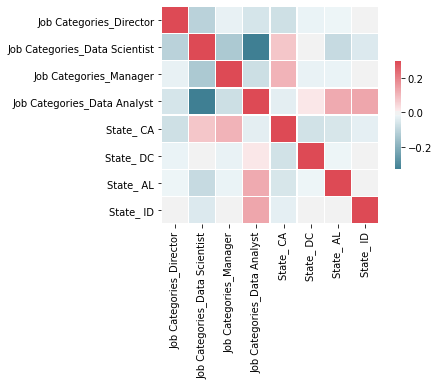

In [42]:
# top 2 and bottom 2 job categories and states. we are checking here if maybe certain states are limited to particular
# job opportunities. while there exist come correlations, we cannot rule out states as having a different 

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Job Categories_Director','Job Categories_Data Scientist','Job Categories_Manager','Job Categories_Data Analyst','State_ CA','State_ DC','State_ AL','State_ ID']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

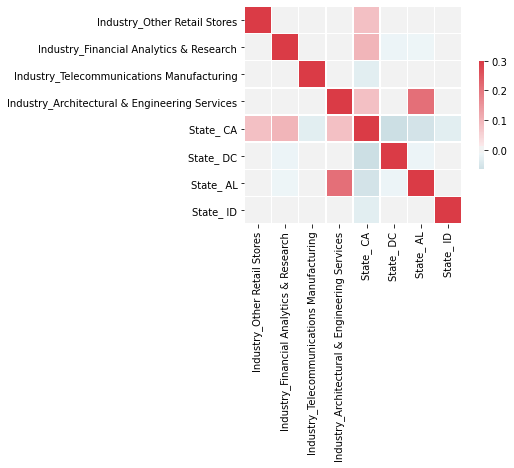

In [52]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Industry_Other Retail Stores','Industry_Financial Analytics & Research','Industry_Telecommunications Manufacturing','Industry_Architectural & Engineering Services','State_ CA','State_ DC','State_ AL','State_ ID']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

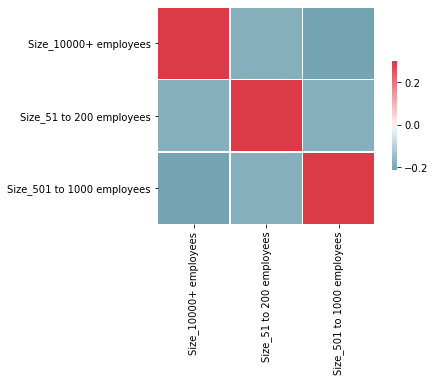

In [50]:
# here we are looking to see if there is a huge correlation between size of company and revenue, to see if both are necessary 
# to predict the salary, or if we should only use one of them.

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Size_10000+ employees','Size_51 to 200 employees','Size_501 to 1000 employees']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})
